In [21]:
#I want to see at which point in life the population decreases. I hypothesize that as a population ages, there will be less of them around for obvious reasons (health)


In [ ]:
import pandas as pd

In [22]:
import json

In [31]:
df = pd.read_json("http://api.population.io/1.0/population/2010/United%20States/?format=json")
df

,age,country,females,males,total,year
0,0,United States,1966000,2054000,4019000,2010
1,1,United States,1973000,2056000,4030000,2010
2,2,United States,1979000,2059000,4038000,2010
3,3,United States,1983000,2061000,4043000,2010
4,4,United States,1985000,2063000,4048000,2010
5,5,United States,1987000,2066000,4052000,2010
6,6,United States,1988000,2069000,4057000,2010
7,7,United States,1989000,2073000,4062000,2010
8,8,United States,1991000,2079000,4070000,2010
9,9,United States,1994000,2086000,4081000,2010


In [32]:
#summary statistics 
df.describe()

,age,females,males,total,year
count,101.000000,1.010000e+02,1.010000e+02,1.010000e+02,101.0
mean,50.000000,1.550380e+06,1.517774e+06,3.068077e+06,2010.0
std,29.300171,7.386395e+05,8.198459e+05,1.556457e+06,0.0
min,0.000000,2.520000e+04,4.920000e+03,3.010000e+04,2010.0
25%,25.000000,8.820000e+05,7.260000e+05,1.607000e+06,2010.0
50%,50.000000,1.989000e+06,2.044000e+06,4.038000e+06,2010.0
75%,75.000000,2.088000e+06,2.142000e+06,4.234000e+06,2010.0
max,100.000000,2.310000e+06,2.296000e+06,4.606000e+06,2010.0


In [33]:
#Identify ways to clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
age        101 non-null int64
country    101 non-null object
females    101 non-null int64
males      101 non-null int64
total      101 non-null int64
year       101 non-null int64
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [34]:
df.columns[df.isnull().any()]

Index([], dtype='object')

,age,females,males,total,year
0.25,25.0,882000.0,726000.0,1607000.0,2010.0
0.75,75.0,2088000.0,2142000.0,4234000.0,2010.0
iqr,50.0,1206000.0,1416000.0,2627000.0,0.0
whisker_length,75.0,1809000.0,2124000.0,3940500.0,0.0
max_whisker,150.0,3897000.0,4266000.0,8174500.0,2010.0
min_whisker,-50.0,-927000.0,-1398000.0,-2333500.0,2010.0


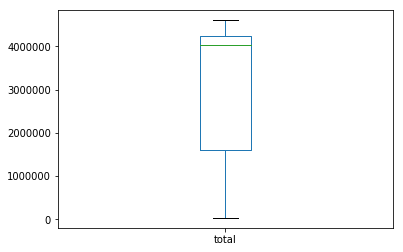

In [36]:
## shows graphs inline
%matplotlib inline
bbox = df['total'].plot(kind="box")
q_df = df.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 1.5 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

Text(0.5, 1.0, 'Population')

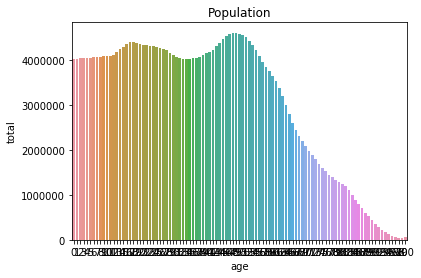

In [41]:
import seaborn as sns
sns.barplot(df.age, df.total).set_title('Population')